在沙盒环境下，黄金分割分析

In [1]:
import os, copy, sys, itertools
os.environ['ULTRON_DATA'] = 'keim'
os.environ['IGNORE_WARNINGS'] = '0'
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [2]:
from ultron.ump.technical.line import Line
from ultron.ump.technical.golden import create_golden
from ultron.ump.technical.exectue import below_above_gen

/var/log/ultron/2022-10-03.log


In [3]:
from ultron.env import *

In [4]:
enable_example_env()

2022-10-03 20:24:55,998 - [env.py:81] - ultron - INFO - enable example env will only read /home/kerry/ultron/rom/sandbox/keim


#### 加载行情

In [5]:
market_data = pd.read_csv(os.path.join(g_project_data, 'market_data.csv'), index_col=0)
market_data['trade_date'] = pd.to_datetime(market_data['trade_date'])
market_data = market_data.reset_index().set_index('code').loc['RB'][['trade_date','closePrice']]
market_data = market_data.set_index('trade_date').rename(columns={'closePrice':'close'})
market_data.head()

,close
trade_date,
2017-10-27,2019.1121
2017-10-30,2015.7253
2017-10-31,2047.9001
2017-11-01,2011.2095
2017-11-02,2055.8027


In [6]:
kl_tl = Line(market_data['close'][-252:], 'close')

#### 黄金分隔带

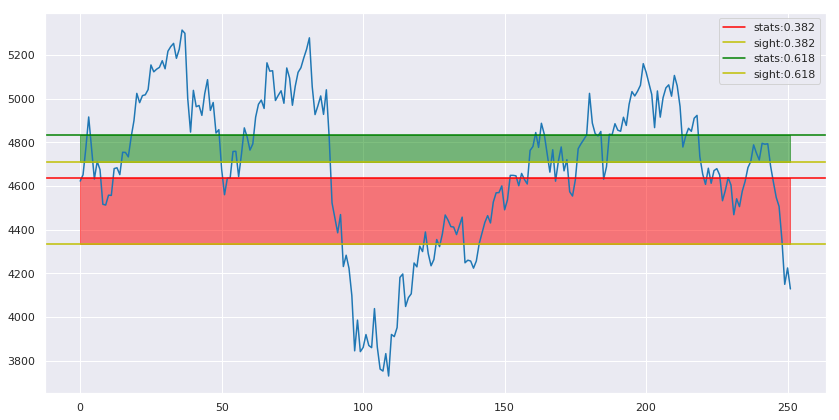

In [7]:
pts_dict = kl_tl.create_golden()
y = kl_tl.tl
x = np.arange(0, len(y))
plt.figure(figsize=(14, 7))
K_PLT_MAP_STYLE = ['r', 'g', 'c', 'k', 'm', 'r', 'y']
plt.plot(y)
for pt, color in zip(pts_dict, itertools.cycle(K_PLT_MAP_STYLE)):
    stats_key = 'stats:{}'.format(pt)
    sight_key = 'sight:{}'.format(pt)
    p_dict = {
                    stats_key: pts_dict[pt][0],
                    sight_key: pts_dict[pt][1]
                }
    plt.axhline(p_dict[stats_key], c=color, label=stats_key)
    plt.axhline(p_dict[sight_key], c='y', label=sight_key)

    below, above = below_above_gen(*pts_dict[pt])
    plt.fill_between(x, below, above, alpha=0.5, color=color)
    plt.legend(loc='best')

#### 黄金分隔带 + 关键比例

In [8]:
kl_pd = market_data[-252:]
golden = create_golden(kl_pd)

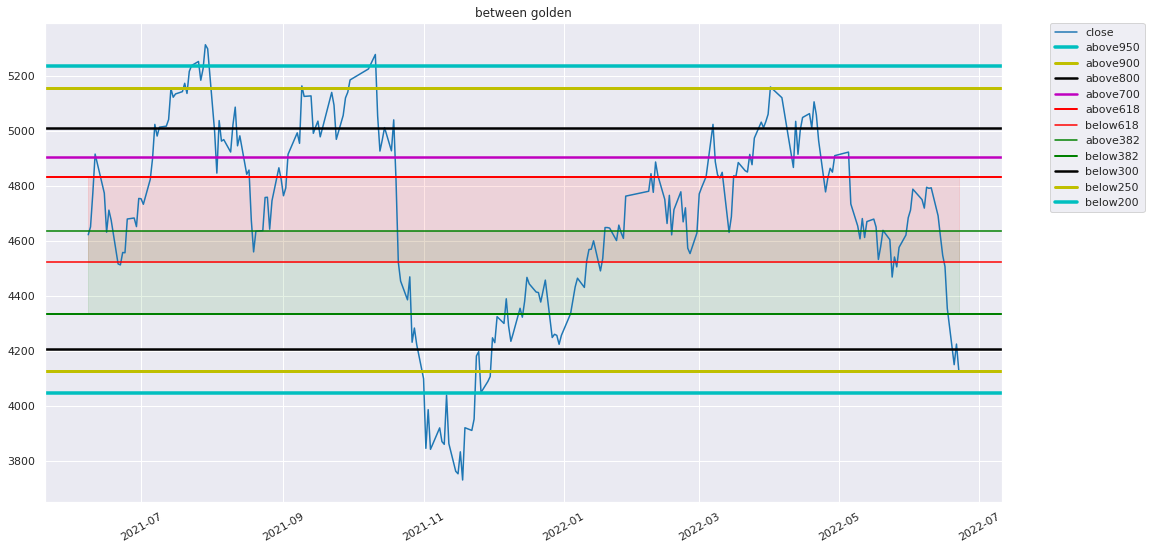

In [9]:
# 开始可视化黄金分割及比例分割结果
plt.figure(figsize=(14, 7))
plt.axes([0.025, 0.025, 0.95, 0.95])
plt.plot(kl_pd.close)

# 0.70, 0.80, 0.90, 0.95，lw线条粗度递减
plt.axhline(golden.above950, lw=3.5, color='c')
plt.axhline(golden.above900, lw=3.0, color='y')
plt.axhline(golden.above800, lw=2.5, color='k')
plt.axhline(golden.above700, lw=2.5, color='m')

# 中间层的618是带，有上下底
plt.axhline(golden.above618, lw=2, color='r')
plt.axhline(golden.below618, lw=1.5, color='r')
plt.fill_between(kl_pd.index,
                golden.above618,
                golden.below618,
                alpha=0.1,
                color="r")

# 中间层的382是带，有上下底
plt.axhline(golden.above382, lw=1.5, color='g')
plt.axhline(golden.below382, lw=2, color='g')
plt.fill_between(kl_pd.index,
                golden.above382,
                golden.below382,
                alpha=0.1,
                color="g")

# 0.20, 0.25, 0.30 lw线条粗度递曾
plt.axhline(golden.below300, lw=2.5, color='k')
plt.axhline(golden.below250, lw=3.0, color='y')
plt.axhline(golden.below200, lw=3.5, color='c')

_ = plt.setp(plt.gca().get_xticklabels(), rotation=30)
plt.legend([
                'close', 'above950', 'above900', 'above800', 'above700',
                'above618', 'below618', 'above382', 'below382', 'below300',
                'below250', 'below200'
            ],
                       bbox_to_anchor=(1.05, 1),
                       loc=2,
                       borderaxespad=0.)
plt.title('between golden')
plt.show()

##### 关键比例

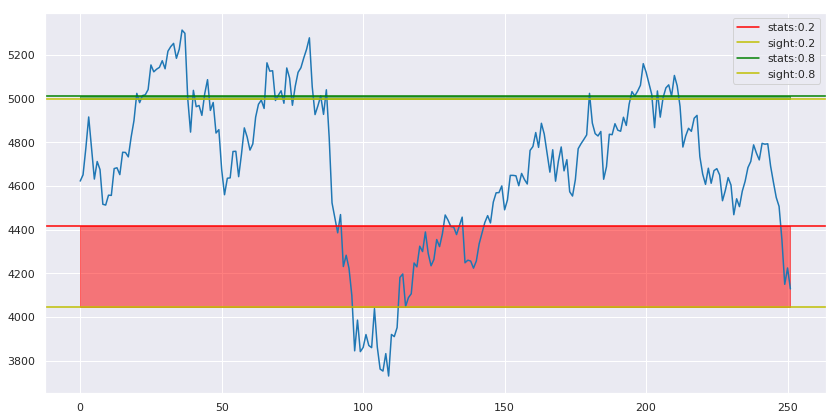

In [10]:
pts_dict = kl_tl.golden_percents(percents=(0.2,0.8))
y = kl_tl.tl
x = np.arange(0, len(y))
plt.figure(figsize=(14, 7))
K_PLT_MAP_STYLE = ['r', 'g', 'c', 'k', 'm', 'r', 'y']
plt.plot(y)
for pt, color in zip(pts_dict, itertools.cycle(K_PLT_MAP_STYLE)):
    stats_key = 'stats:{}'.format(pt)
    sight_key = 'sight:{}'.format(pt)
    p_dict = {
                    stats_key: pts_dict[pt][0],
                    sight_key: pts_dict[pt][1]
                }
    plt.axhline(p_dict[stats_key], c=color, label=stats_key)
    plt.axhline(p_dict[sight_key], c='y', label=sight_key)

    below, above = below_above_gen(*pts_dict[pt])
    plt.fill_between(x, below, above, alpha=0.5, color=color)
    plt.legend(loc='best')